<a href="https://colab.research.google.com/github/Akasonal/Telecom-Churn-Prediction/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description of Project
####Churn:-Rate of attrition, the rate at which customer ends taking service from a particular company.
####Each row represents a customer, each column contains customer’s attributes described on the column.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## Acquiring the dataset (i have taken the kaggle dataset to solve this specific problem)

In [1]:
#importing necessary library that will be used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
from google.colab import files
files.upload()

{}

In [3]:
df=pd.read_csv("customer churn.csv")
df.head()  #printing first five rows

state  account_length  ... number_customer_service_calls churn
0    OH             107  ...                             1    no
1    NJ             137  ...                             0    no
2    OH              84  ...                             2    no
3    OK              75  ...                             3    no
4    MA             121  ...                             3    no

[5 rows x 20 columns]

## Understanding data and preprocessing 

In [4]:
df.columns  #printing index of features(all the feature names)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [5]:
len(df.columns)     #total number of features present in dataset

20

In [6]:
df.isnull().values.any()  #is there any null values present in dataset(if True :-yes null value is present else no null values)

False

In [7]:
df.isnull().sum()  #crosschecking is there any null values present in dataset or not

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
df.info()    #information about each columns present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [9]:
df.shape  #number of rows and columns present in dataset

(4250, 20)

In [10]:
#statistical description of numerical data
df.describe().T

count        mean  ...       75%     max
account_length                 4250.0  100.236235  ...  127.0000  243.00
number_vmail_messages          4250.0    7.631765  ...   16.0000   52.00
total_day_minutes              4250.0  180.259600  ...  216.2000  351.50
total_day_calls                4250.0   99.907294  ...  113.0000  165.00
total_day_charge               4250.0   30.644682  ...   36.7500   59.76
total_eve_minutes              4250.0  200.173906  ...  233.7750  359.30
total_eve_calls                4250.0  100.176471  ...  114.0000  170.00
total_eve_charge               4250.0   17.015012  ...   19.8675   30.54
total_night_minutes            4250.0  200.527882  ...  234.7000  395.00
total_night_calls              4250.0   99.839529  ...  113.0000  175.00
total_night_charge             4250.0    9.023892  ...   10.5600   17.77
total_intl_minutes             4250.0   10.256071  ...   12.0000   20.00
total_intl_calls               4250.0    4.426353  ...    6.0000   20.00
total_intl_charge              4250.0    2.769654  ...    3.2400    5.40
number_customer_service_calls  4250.0    1.559059  ...    2.0000    9.00

[15 rows x 8 columns]

In [11]:
df_cat=df.dtypes[df.dtypes=="object"]
df_cat.describe()  #statistical description categorical data

count          5
unique         1
top       object
freq           5
dtype: object

## Data Visualization

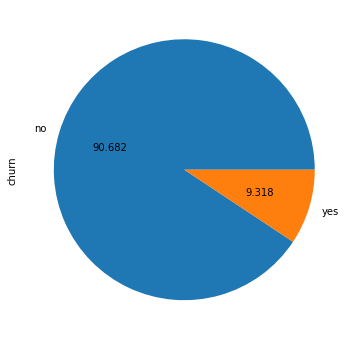

In [12]:
plt.figure(figsize=(8,6))
df.groupby(["international_plan"])["churn"].count().plot(kind="pie",autopct="%0.3f")
plt.show()

9.318 percent of peoiple who has international plan prefered not to take plan from operator next month

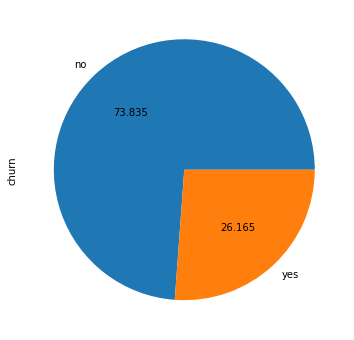

In [13]:
plt.figure(figsize=(8,6))
df.groupby(["voice_mail_plan"])['churn'].count().plot(kind="pie",autopct="%0.3f")
plt.show()

Person who has taken voice mail plan prefer not to continue with same operator next month

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


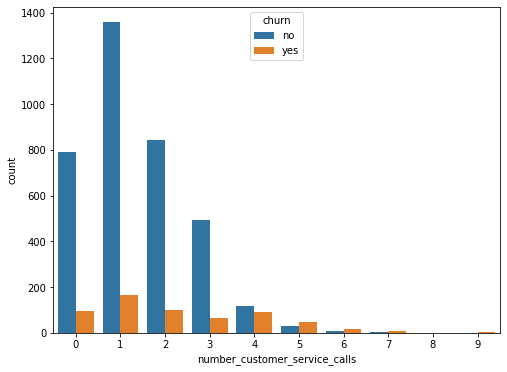

In [14]:
plt.figure(figsize=(8,6))
sns.countplot("number_customer_service_calls",hue="churn",data=df)
plt.show()

As the number of complains increased for a telecom operator greater is the chances for attrition of customer

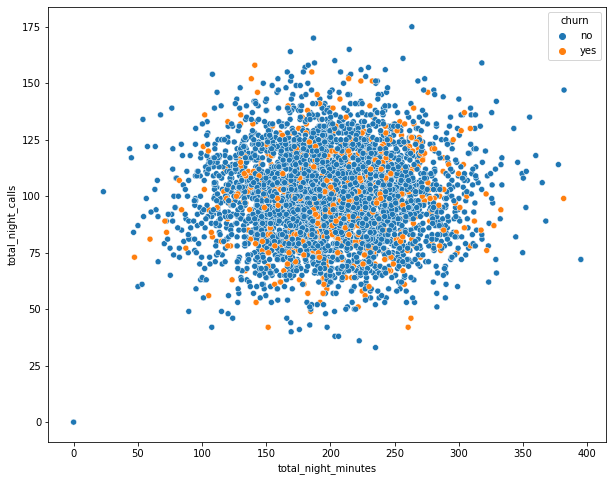

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="total_night_minutes",y="total_night_calls",hue="churn",data=df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


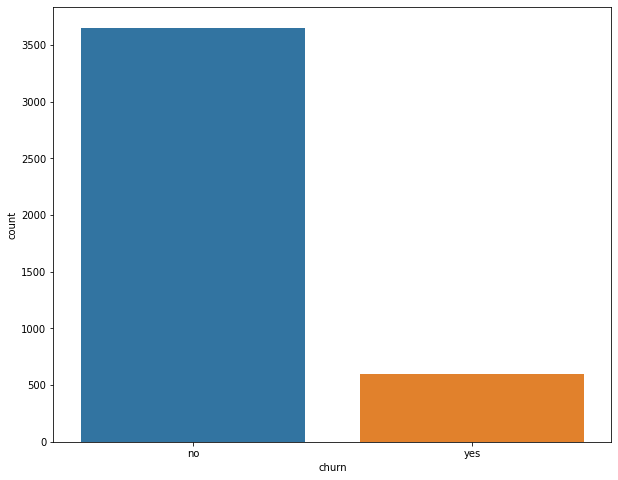

In [16]:
#lets's visualize target label
plt.figure(figsize=(10,8))
sns.countplot("churn",data=df)
plt.show()

obviously the data is imbalanced because small segment of customer is decideded to leave a particular telecom operator due to specific region according to our above visualization we can say that more the customer care will recieve the call  more will be chances to loose customer.

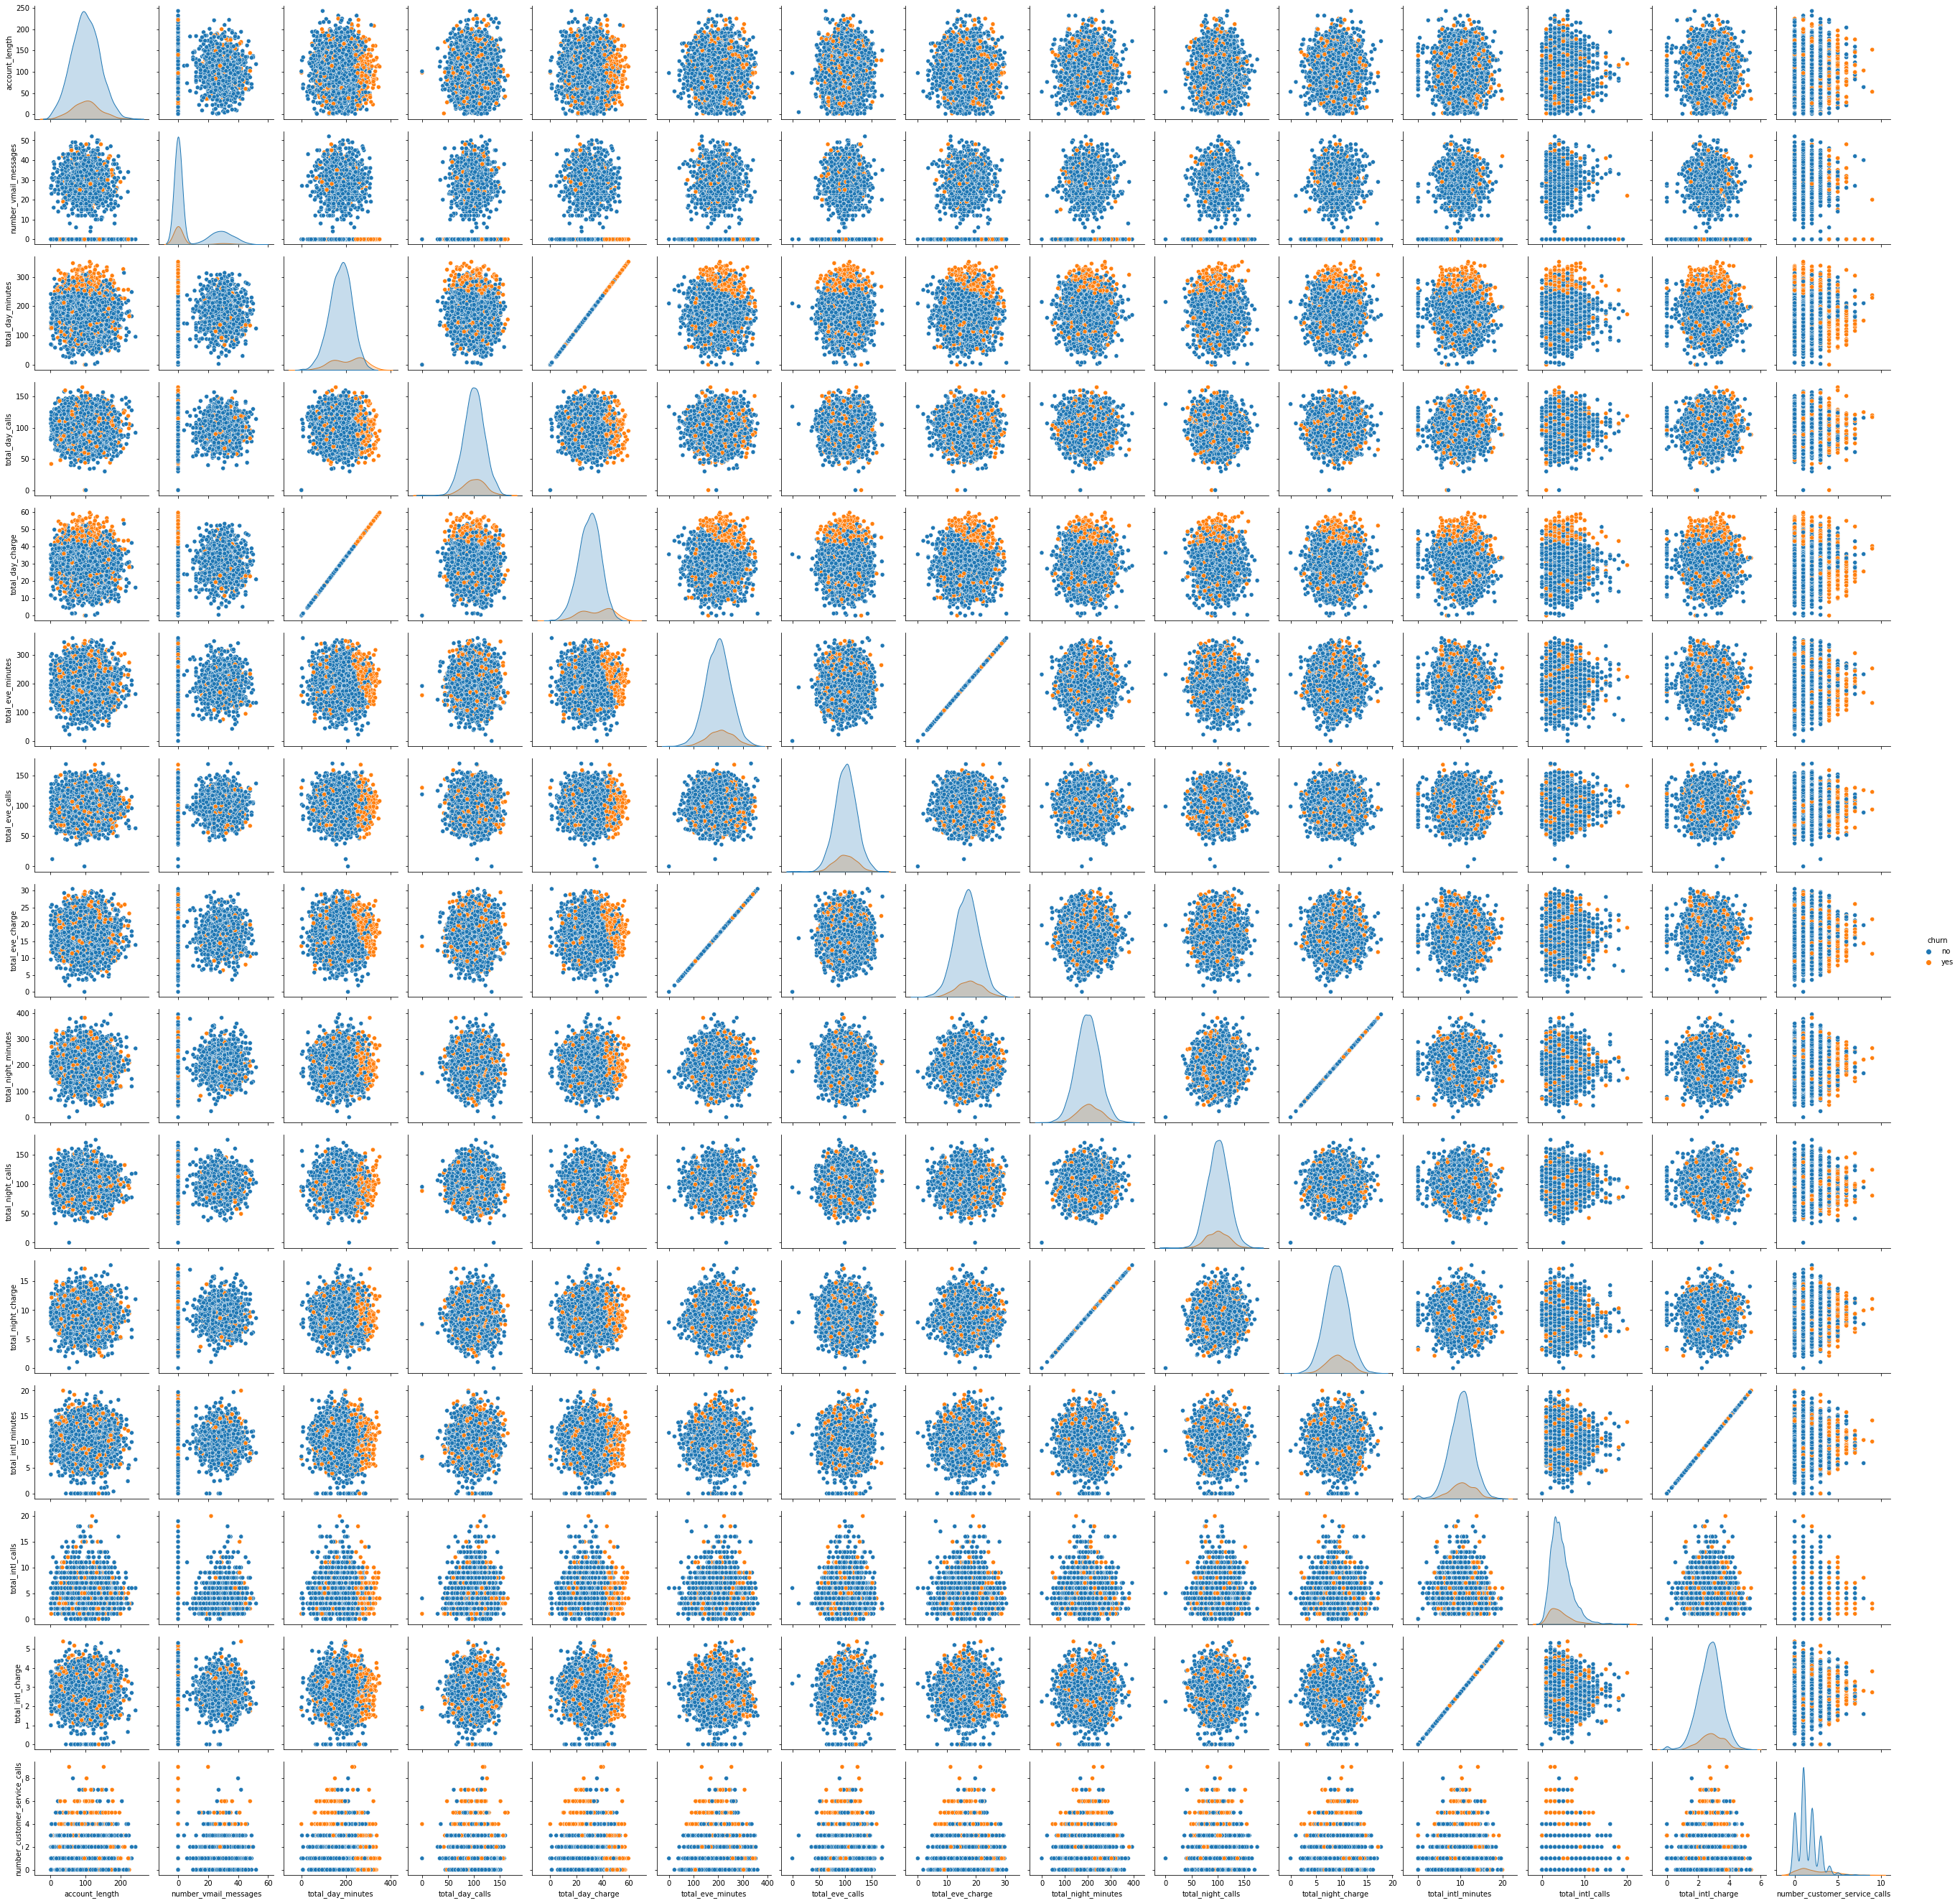

In [17]:
sns.pairplot(df,hue="churn")   #visualizing each and individual data using pair plot
plt.show()

the data is overlapping hence here one thing is clear that the linear model will not work properly and we should prefer ml algorithm like knn,svm kernel to solve these kind of problems

## Feature Engineering
why we need it ?

Machine understand numerical value if we will give the categorical value then it will give wrong interpretation about data hence to obtain better prediction we first convert categorical features into numerical features then will go for further modeling

In [18]:
#extracting all the categorical features with their unique values
categorical_features={}
for i in df.columns:
  if df[i].dtypes=="object":
    categorical_features[i]=len(df[i].unique())
categorical_features

{'area_code': 3,
 'churn': 2,
 'international_plan': 2,
 'state': 51,
 'voice_mail_plan': 2}

In [19]:
cat_feat=list(categorical_features.keys())
cat_feat

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [20]:
categorical_features=df.loc[:,cat_feat]
categorical_features.head()

state      area_code international_plan voice_mail_plan churn
0    OH  area_code_415                 no             yes    no
1    NJ  area_code_415                 no              no    no
2    OH  area_code_408                yes              no    no
3    OK  area_code_415                yes              no    no
4    MA  area_code_510                 no             yes    no

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in cat_feat:
  categorical_features[i]=label_encoder.fit_transform(categorical_features[i])


In [22]:
categorical_features.head()

state  area_code  international_plan  voice_mail_plan  churn
0     35          1                   0                1      0
1     31          1                   0                0      0
2     35          0                   1                0      0
3     36          1                   1                0      0
4     19          2                   0                1      0

#### Dropping categorical features from original df and adding it's encoded version

In [23]:
df_1=df.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'],axis=1)
df=pd.concat([df_1,categorical_features],axis=1)
df.head()

account_length  number_vmail_messages  ...  voice_mail_plan  churn
0             107                     26  ...                1      0
1             137                      0  ...                0      0
2              84                      0  ...                0      0
3              75                      0  ...                0      0
4             121                     24  ...                1      0

[5 rows x 20 columns]

In [40]:
df.shape

(4250, 20)

In [24]:
#rechecking is there any null value present after encoding
df.isnull().values.any()

False

In [42]:
from imblearn.over_sampling import RandomOverSampler
os_method=RandomOverSampler()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_res,Y_res=os_method.fit_sample(X,Y)
df_1=pd.DataFrame(X_res,columns=X.columns)
df_1["churn"]=Y_res
df_1.head()

account_length  number_vmail_messages  ...  voice_mail_plan  churn
0           107.0                   26.0  ...              1.0      0
1           137.0                    0.0  ...              0.0      0
2            84.0                    0.0  ...              0.0      0
3            75.0                    0.0  ...              0.0      0
4           121.0                   24.0  ...              1.0      0

[5 rows x 20 columns]

In [44]:
df_1.shape

(7304, 20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


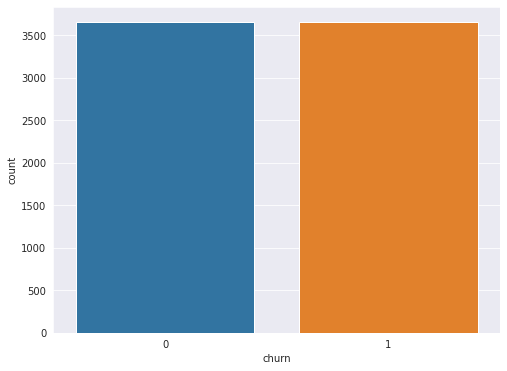

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(df_1["churn"])
plt.show()

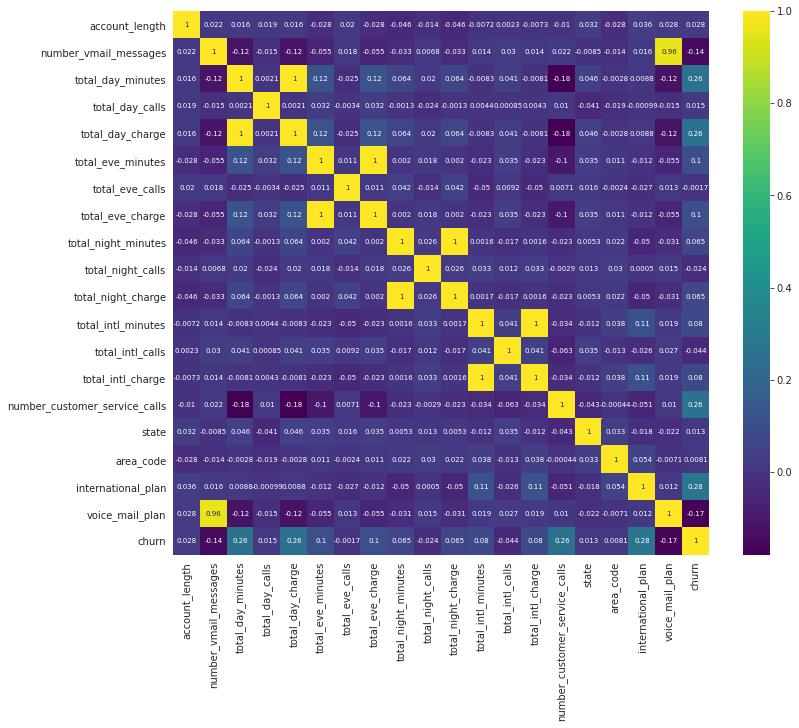

In [27]:
#correlation plot
corr=df_1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,annot_kws={"size":7},cmap="viridis")
plt.show()

#### understanding  is there any outliers present in dataset or not

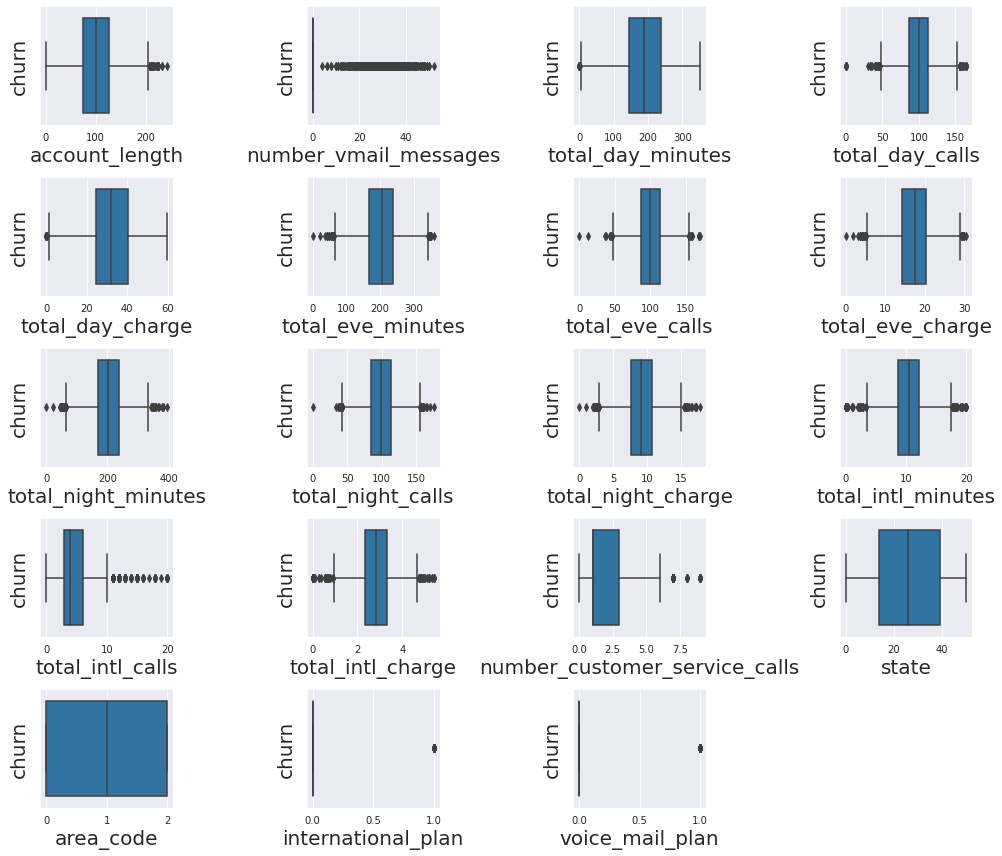

In [28]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
plt.figure(figsize=(14,12))
j=1
for i in df_1.columns:
  if i!="churn":
    if j<=len(df_1.columns):
      plt.subplot(5,4,j)
      sns.boxplot(df_1[i])
      plt.xlabel(i,fontsize=20)
      plt.ylabel("churn",fontsize=20)
  j+=1
  plt.tight_layout()
plt.show()

whatever values lies above upper limit and below lower limit will be considered as outlier and we will remove it

#### Spliting the data and deciding which algorithm will be best fit for prediction

#### AS we can see from above box plot we will be able to remove the outliers

In [67]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
X=df_1.iloc[:,:-1]
Y=df_1.iloc[:,-1]

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5843, 19)
(5843,)
(1461, 19)
(1461,)


In [58]:
#Evaluating and finding best model for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models=[]
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM",SVC()))
models.append(("RF",RandomForestClassifier()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("XGB",XGBClassifier()))
names=[]
results=[]
for name,model in models:
  kfold=KFold(n_splits=5,shuffle=True,random_state=1)
  score=cross_val_score(model,X_train,Y_train,scoring="accuracy")
  results.append(score)
  names.append(name)
  print(f"mean score is of {name} is : {score.mean()} and deviation is {score.std()}")



mean score is of KNN is : 0.7932595181457047 and deviation is 0.009357589595190468
mean score is of SVM is : 0.6866327032822808 and deviation is 0.008245439531214921
mean score is of RF is : 0.9888744038342103 and deviation is 0.003206371715515633
mean score is of CART is : 0.9623483951861441 and deviation is 0.005046000479696285
mean score is of XGB is : 0.8962844369968478 and deviation is 0.006664250402189271


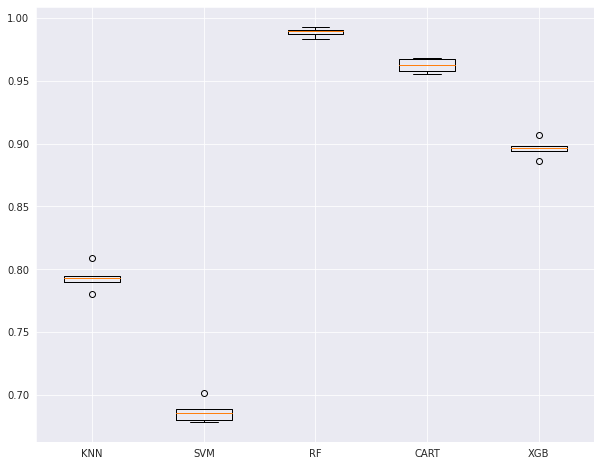

In [59]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.boxplot(results,labels=names)
plt.show()

As we can see random forest works well will out data hence we will go with random forest for further prediction of model

## Feature Selection for selecting best feature to get good prediction

In [69]:
#We will use feature importance method of random forest to select best features
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
importances=rf_model.feature_importances_
importances=np.sort(importances)
importances

array([0.00754082, 0.0143314 , 0.02480016, 0.02681009, 0.02705961,
       0.02812296, 0.02935149, 0.0322035 , 0.0357234 , 0.03702705,
       0.03797167, 0.03890279, 0.04043314, 0.05379307, 0.05808821,
       0.09002504, 0.12909114, 0.13146027, 0.15726419])

In [71]:
print(X_train.shape)
print(Y_train.shape)


(5843, 19)
(5843,)


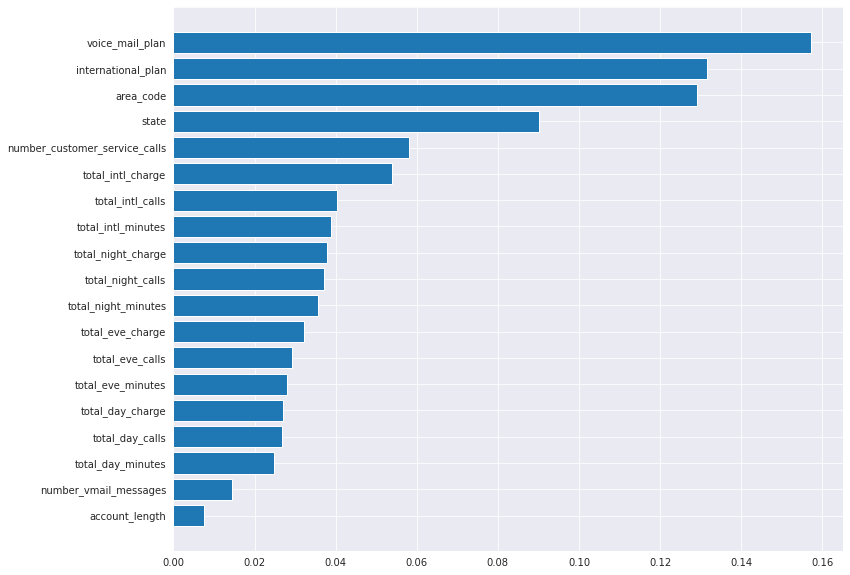

In [72]:
plt.figure(figsize=(12,10))
plt.barh(X_train.columns,importances)
plt.show()

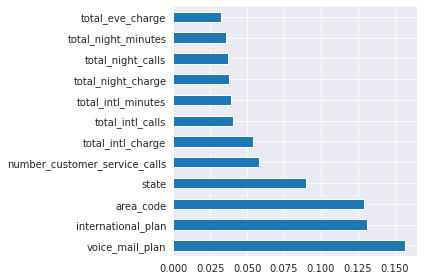

In [73]:
feature_importances_train=pd.Series(importances,X_train.columns).nlargest(12)
feature_importances_test=pd.Series(importances,X_test.columns).nlargest(12)
feature_importances_train.nlargest(12).plot(kind="barh")
plt.tight_layout()
plt.show()

### Here I was doing the outliers removal which resulted into removal of complete data from  international_plan hence we avoid outlier removal because the internationala-plan is on of the most important feature present in dataset

In [80]:
list1=[x for x in feature_importances_train.index.tolist()]
list1

['voice_mail_plan',
 'international_plan',
 'area_code',
 'state',
 'number_customer_service_calls',
 'total_intl_charge',
 'total_intl_calls',
 'total_intl_minutes',
 'total_night_charge',
 'total_night_calls',
 'total_night_minutes',
 'total_eve_charge']

In [92]:
X_train1=pd.DataFrame(X_train.loc[:,['voice_mail_plan','international_plan','area_code','state','number_customer_service_calls','total_intl_charge','total_intl_calls','total_intl_minutes','total_night_charge','total_night_calls','total_night_minutes','total_eve_charge']])
X_test1=pd.DataFrame(X_test.loc[:,['voice_mail_plan','international_plan','area_code','state','number_customer_service_calls','total_intl_charge','total_intl_calls','total_intl_minutes','total_night_charge','total_night_calls','total_night_minutes','total_eve_charge']])
X_train1.shape
X_test1.shape

(1461, 12)

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix
model=RandomForestClassifier()
model.fit(X_train1,Y_train)
predicted=model.predict(X_test1)
print(accuracy_score(predicted,Y_test))

0.9767282683093771


## Applying Hyperparameter tuning to get best fit result


In [103]:
from sklearn.model_selection import RandomizedSearchCV
random_param={"n_estimators":[100,120,140],
              "criterion":["gini","entropy"],
              "min_samples_leaf":[1,2,5,7],
              }

In [104]:
random_cv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=random_param,cv=5,random_state=1)
random_cv.fit(X_train1,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [108]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
print(random_cv.best_params_)
print(random_cv.best_score_)

{'n_estimators': 140, 'min_samples_leaf': 1, 'criterion': 'entropy'}
0.9693646952670003


# Modelling and Prediction

In [109]:
model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
model.fit(X_train1,Y_train)
predicted=model.predict(X_test1)
print(accuracy_score(Y_test,predicted))

0.9794661190965093


As we can see slightly increase in accuracy can be seen after hyperparameter tuning

In [117]:
from sklearn import metrics
import scikitplot as splt

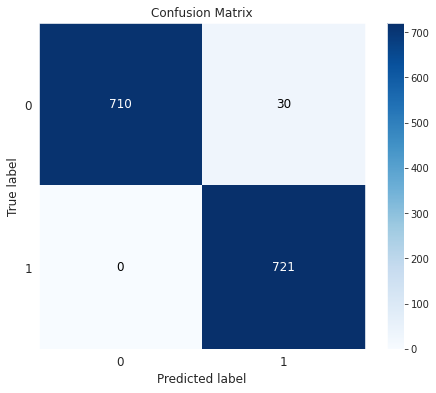

In [119]:
splt.metrics.plot_confusion_matrix(Y_test,predicted,figsize=(8,6),text_fontsize="large")
plt.show()

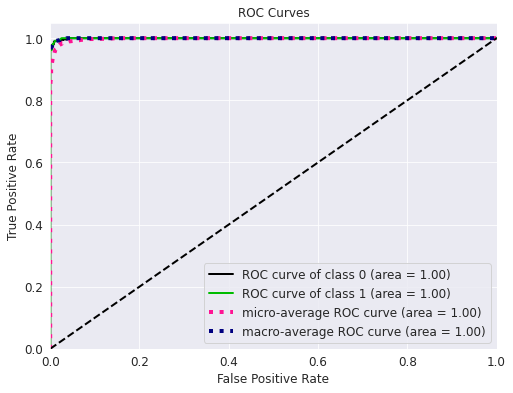

In [123]:
splt.metrics.plot_roc_curve(Y_test,model.predict_proba(X_test1),figsize=(8,6),text_fontsize="large")
plt.show()

#### Comaring some of the actual and predicted data


In [125]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":predicted})
Result.head(20)  #comparing eirst 20 result

Actual  Predicted
6349       1          1
874        0          0
2188       0          0
6145       1          1
2998       0          0
231        0          0
1144       0          0
6086       1          1
3017       0          0
3675       0          0
5535       1          1
3835       0          0
6003       1          1
1743       0          0
1881       0          0
3035       0          0
1344       1          1
1676       1          1
6739       1          1
2718       0          0

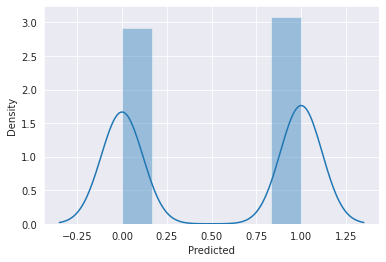

In [127]:
#draw the distribution curve of predicted value
sns.set_style("darkgrid")
sns.distplot(Result["Predicted"])
plt.show()

In [130]:
#storing model in the binary file
import pickle
with open("customerchurn.pkl","wb") as f:
  pickle.dump(model,f)

In [131]:
 pip freeze > requirements.txt